In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import scienceplots
plt.style.use('science')
import corner
from scipy.interpolate import griddata

import interpax

In [2]:
# Define the base name once
base_name = 'UDG_KL_w17c5'

base_name2 = 'UDG_KL_w17c2'

# Use the variable in file paths
dict_load = np.load(f'{base_name}.npy', allow_pickle=True).item()
constrained_values_truth = np.load(f'constrained_values_truth_{base_name}.npy', allow_pickle=True).item()



dict_load2 = np.load(f'{base_name2}.npy', allow_pickle=True).item()
constrained_values_truth2 = np.load(f'constrained_values_truth_{base_name2}.npy', allow_pickle=True).item()


In [3]:
# dict_load = np.load('UDG_KL_test.npy',allow_pickle=True).item()
# constrained_values_truth = np.load('constrained_values_truth_UDG_KL_wider.npy',allow_pickle=True).item()

points = dict_load['points']
log_w = dict_load['log_w']
log_l = dict_load['log_l']



points2 = dict_load2['points']
log_w2 = dict_load2['log_w']
log_l2 = dict_load2['log_l']

In [4]:
dict_load

{'points': array([[-2.06358823e+00,  2.33396078e-02,  5.70611593e-01, ...,
          1.90716760e+00,  3.95085967e+00,  2.23988212e+03],
        [ 3.46641848e+00,  1.02317481e-01,  1.07771497e+00, ...,
          1.81609221e+00,  2.15574883e+00,  7.22723007e+02],
        [ 7.20555174e+00,  1.57685543e-01,  6.12741423e-01, ...,
          1.84114666e+00,  2.47138103e+00,  5.48626534e+02],
        ...,
        [ 1.01226181e+00,  3.25338508e-02,  9.96486112e-01, ...,
          7.96084154e-01,  2.78974591e+00,  1.64554018e+03],
        [ 4.14728022e-02,  1.44891478e-01,  1.11953174e+00, ...,
          1.38165932e+00,  2.51278318e+00,  1.54142960e+03],
        [ 1.66745632e+00,  1.21520905e-01,  1.08961537e+00, ...,
          1.60901690e+00,  2.43975796e+00,  6.39827876e+02]],
       shape=(55500, 10)),
 'log_w': array([          -inf,           -inf, -2543.96703087, ...,
          -16.54865992,   -16.29001855,   -16.27241988], shape=(55500,)),
 'log_l': array([          -inf,           -inf, 

In [5]:
true_params = np.array([constrained_values_truth['y_prog'], 
                        constrained_values_truth['speed'], 
                        constrained_values_truth['vel_theta'],
                        constrained_values_truth['vel_phi'],
                        constrained_values_truth['log10_M_prog'],
                        constrained_values_truth['log10_m_halo'],
                        constrained_values_truth['r_s'],
                         constrained_values_truth['gamma'],
                         constrained_values_truth['beta'],
                         constrained_values_truth['t_age']
                        ])

prior_keys =   ['y_prog',
                '$v$',
                'theta',
                'phi',
                'log10_M_prog',
                'log10_m_halo',
                'r_s',
                'gamma',
                'beta',
                't_age']

In [6]:
idx = np.argmax(log_l)
points[idx][4]

np.float64(4.674257335812329)

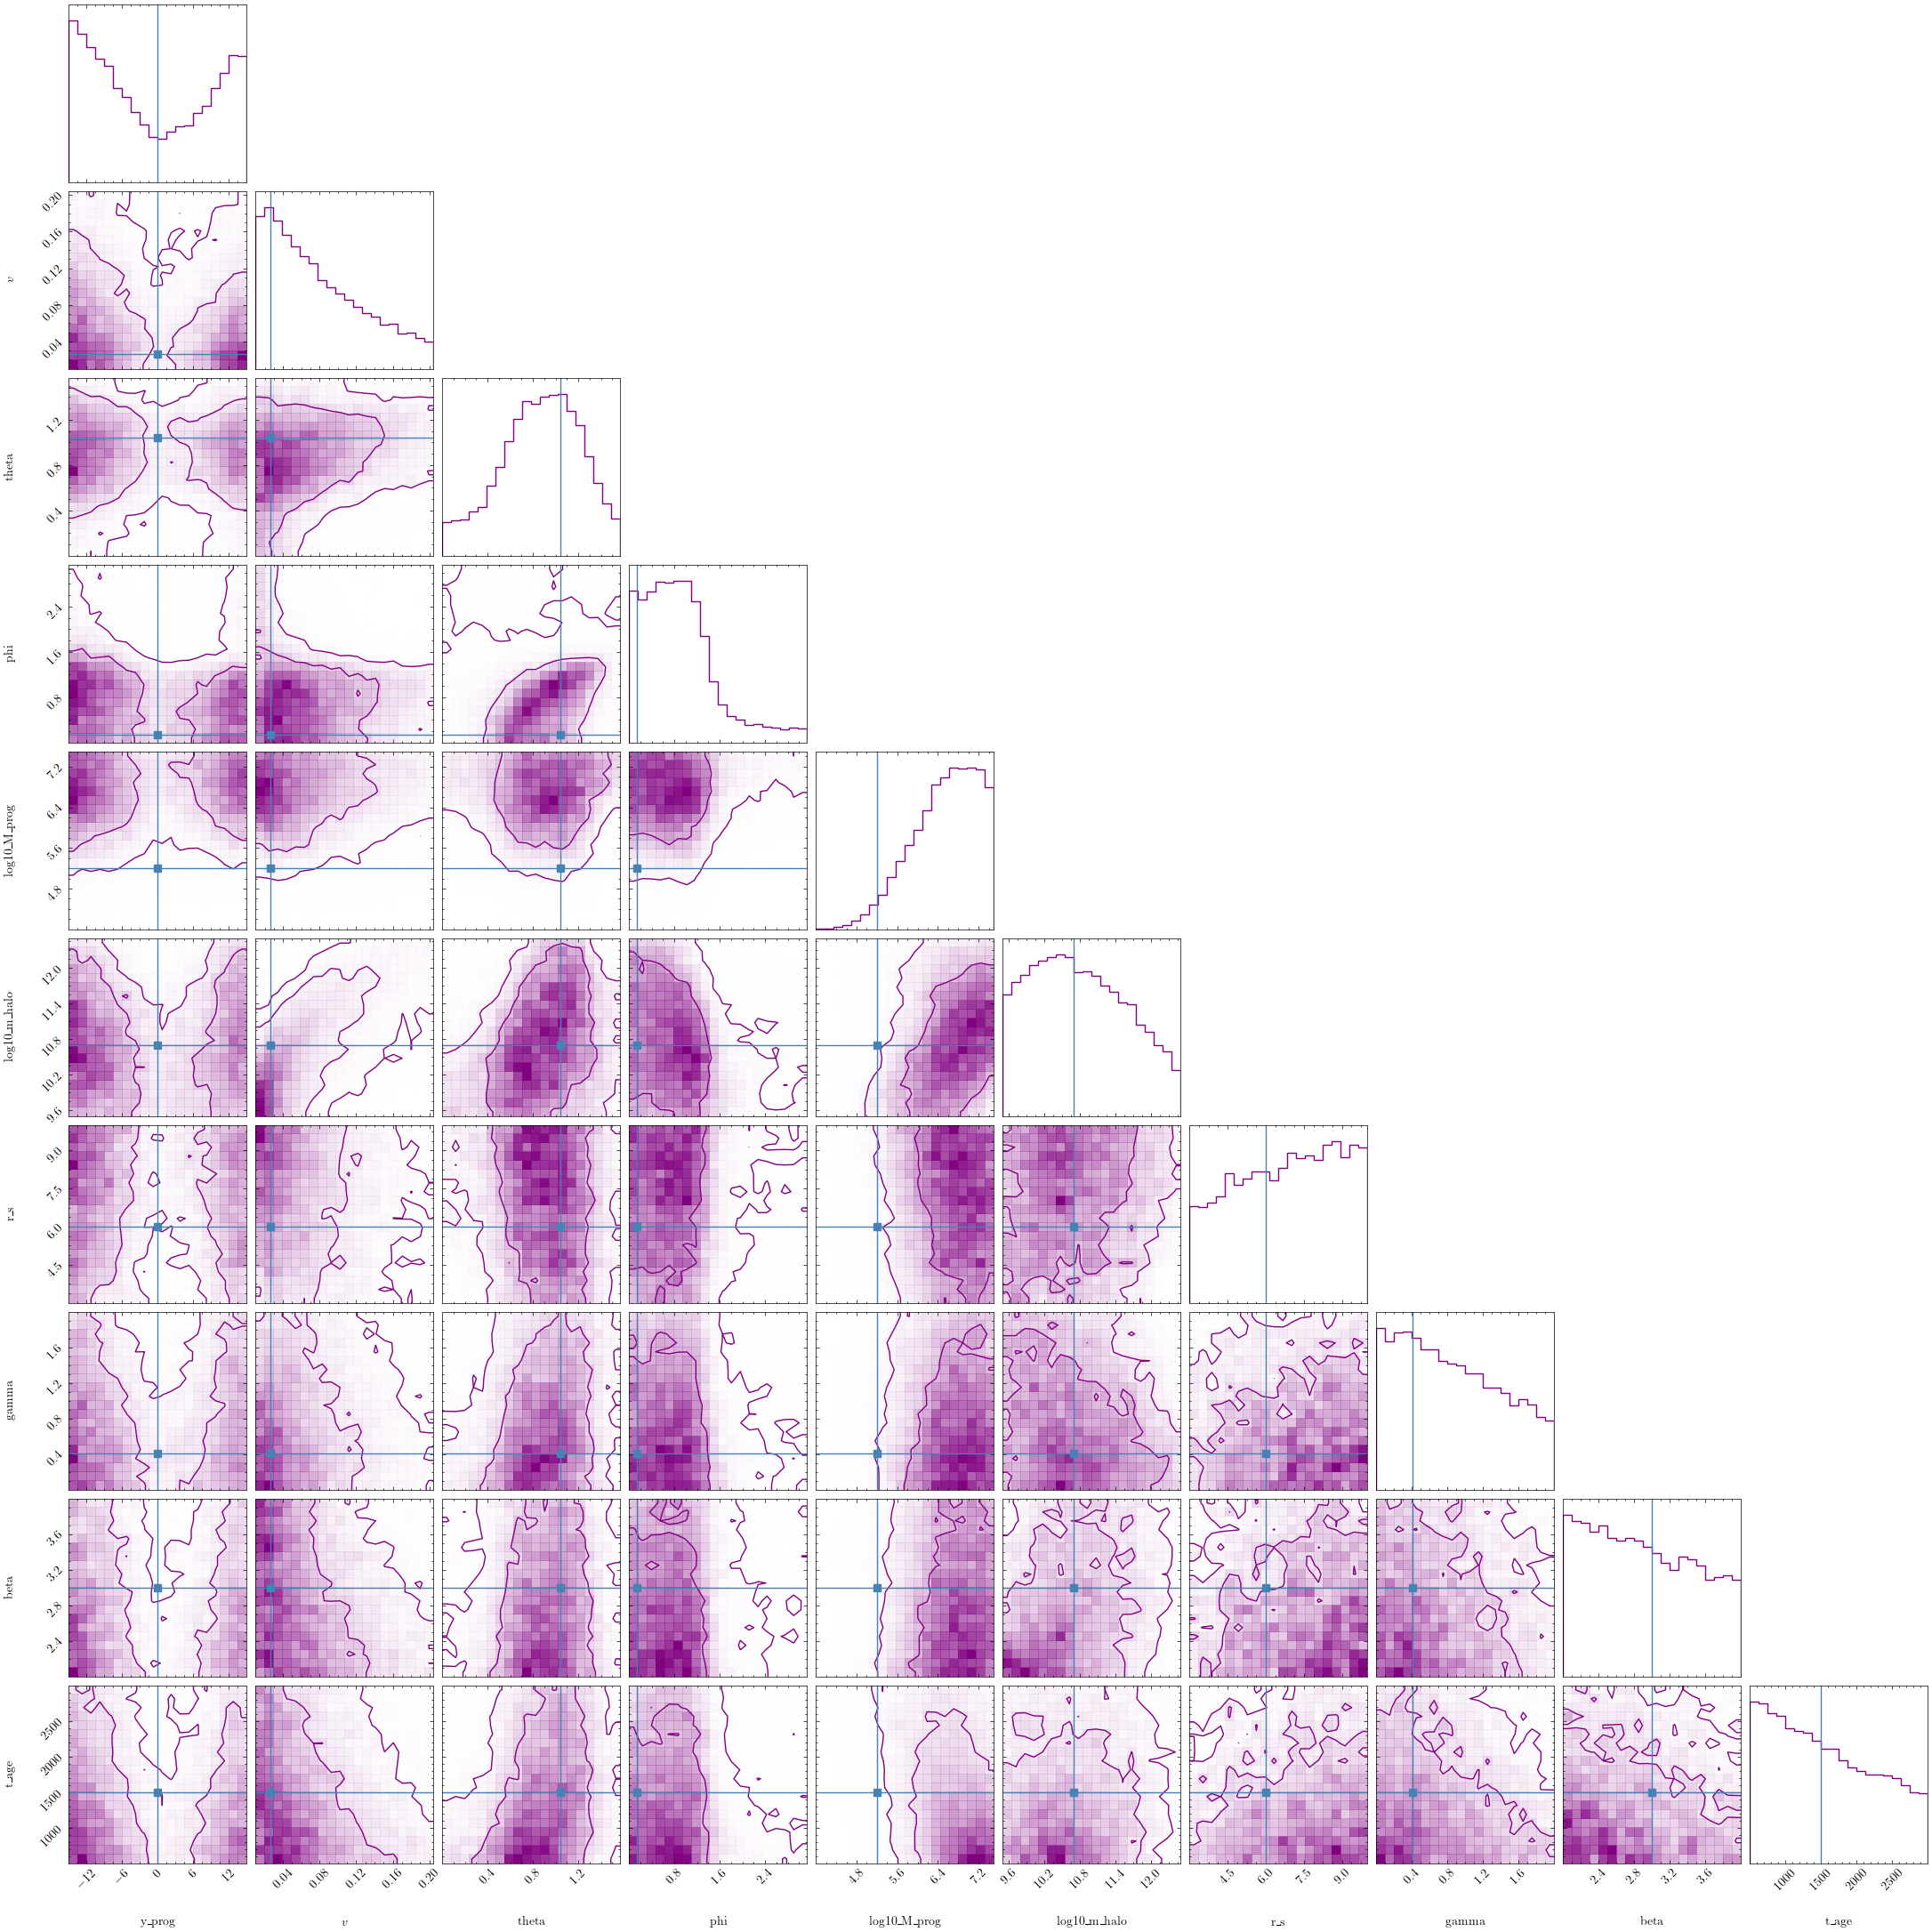

In [7]:
corner.corner(
    points, weights=np.exp(log_w-log_w.max()), bins=20, labels=prior_keys, color='purple',
    plot_datapoints=False,levels=(0.68,0.95),truths=true_params,
smooth=0.5);

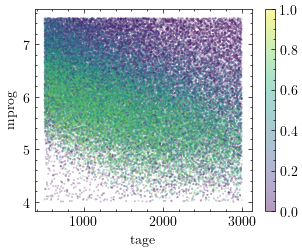

In [8]:

plt.scatter(points[:,-1],points[:,4], c = np.exp(log_l-log_l.max()), alpha = 0.4, s=0.1)
plt.ylabel('mprog')
plt.xlabel('tage')
plt.colorbar()

In [9]:
def Lambda_func(Delta_sigma, N):
    sigma = Delta_sigma + 1
    return N*( -np.log(sigma) -  0.5*((1./sigma**2)) + 0.5  )

Delta_sigma_arr = np.linspace(0,10,100)
def inverse_Lambda_func(Lambda_value,N):
    base_Lambda = Lambda_func(Delta_sigma_arr,N)
    argsort = np.argsort(base_Lambda)
    Lambda_out = base_Lambda[argsort]
    Delta_sigma_arr_resort = Delta_sigma_arr[argsort]
    func = interpax.Interpolator1D(Lambda_out, Delta_sigma_arr_resort, method='cubic')
    return func(Lambda_value)

def P_of_DeltaSig(Delta_sigma):
    return (1./np.sqrt(2*np.pi) )*np.exp(-0.5*Delta_sigma**2)
    

## Rememeber, our log_l is negative KL div
Q_model = -log_l
Q_best = Q_model[np.argmax(log_l)]
N = 94#len(dat_outer)
Lambda_measured = N*(Q_best - Q_model)


DeltaSig_measured = inverse_Lambda_func(Lambda_measured,N)
prob_values_of_samples = P_of_DeltaSig(DeltaSig_measured)
good_bool =  ~np.isnan(prob_values_of_samples)
prob_values_of_samples = prob_values_of_samples[good_bool]/prob_values_of_samples[good_bool].sum()
points_good = points[good_bool]
points_arange = np.arange(len(points_good))

In [10]:
#now for the other run 2


## Rememeber, our log_l is negative KL div
Q_model2 = -log_l2
Q_best2 = Q_model2[np.argmax(log_l2)]
N2 = 123#len(dat_outer)
Lambda_measured2 = N2*(Q_best2 - Q_model2)


DeltaSig_measured2 = inverse_Lambda_func(Lambda_measured2,N2)
prob_values_of_samples2 = P_of_DeltaSig(DeltaSig_measured2)
good_bool2 =  ~np.isnan(prob_values_of_samples2)
prob_values_of_samples2 = prob_values_of_samples2[good_bool2]/prob_values_of_samples2[good_bool2].sum()
points_good2 = points2[good_bool2]
points_arange2 = np.arange(len(points_good2))

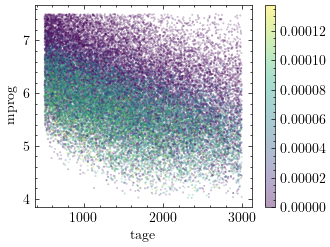

In [11]:

plt.scatter(points_good[:,-1],points_good[:,4], c = prob_values_of_samples, alpha = 0.4, s=0.1)
plt.ylabel('mprog')
plt.xlabel('tage')
plt.colorbar()

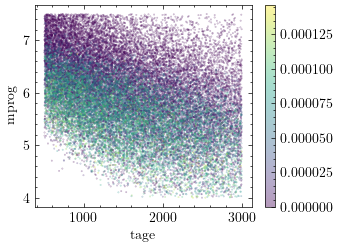

In [12]:

plt.scatter(points_good2[:,-1],points_good2[:,4], c = prob_values_of_samples2, alpha = 0.4, s=0.1)
plt.ylabel('mprog')
plt.xlabel('tage')
plt.colorbar()

In [13]:
np.random.seed(50430)
idx = np.random.choice(points_arange,p=prob_values_of_samples,size=5_000)
points_select = points_good[idx]


In [14]:
np.random.seed(50430)
idx2 = np.random.choice(points_arange2,p=prob_values_of_samples2,size=5_000)
points_select2 = points_good2[idx2]


In [15]:
prior_keys_latex = [r'$y_{\rm prog}$', 
                    r'$v$', 
                    r'$\theta$', 
                     r'$\phi$', 
                    r'$\log_{10}\left( M_{\rm prog} / M_\odot \right)$',
                    r'$\log_{10}\left( M_{\rm halo} / M_\odot \right)$',
                    r'$r_s$',
                    r'$\gamma$',
                    r'$\beta$',
                    r'$t_{\rm age}$']



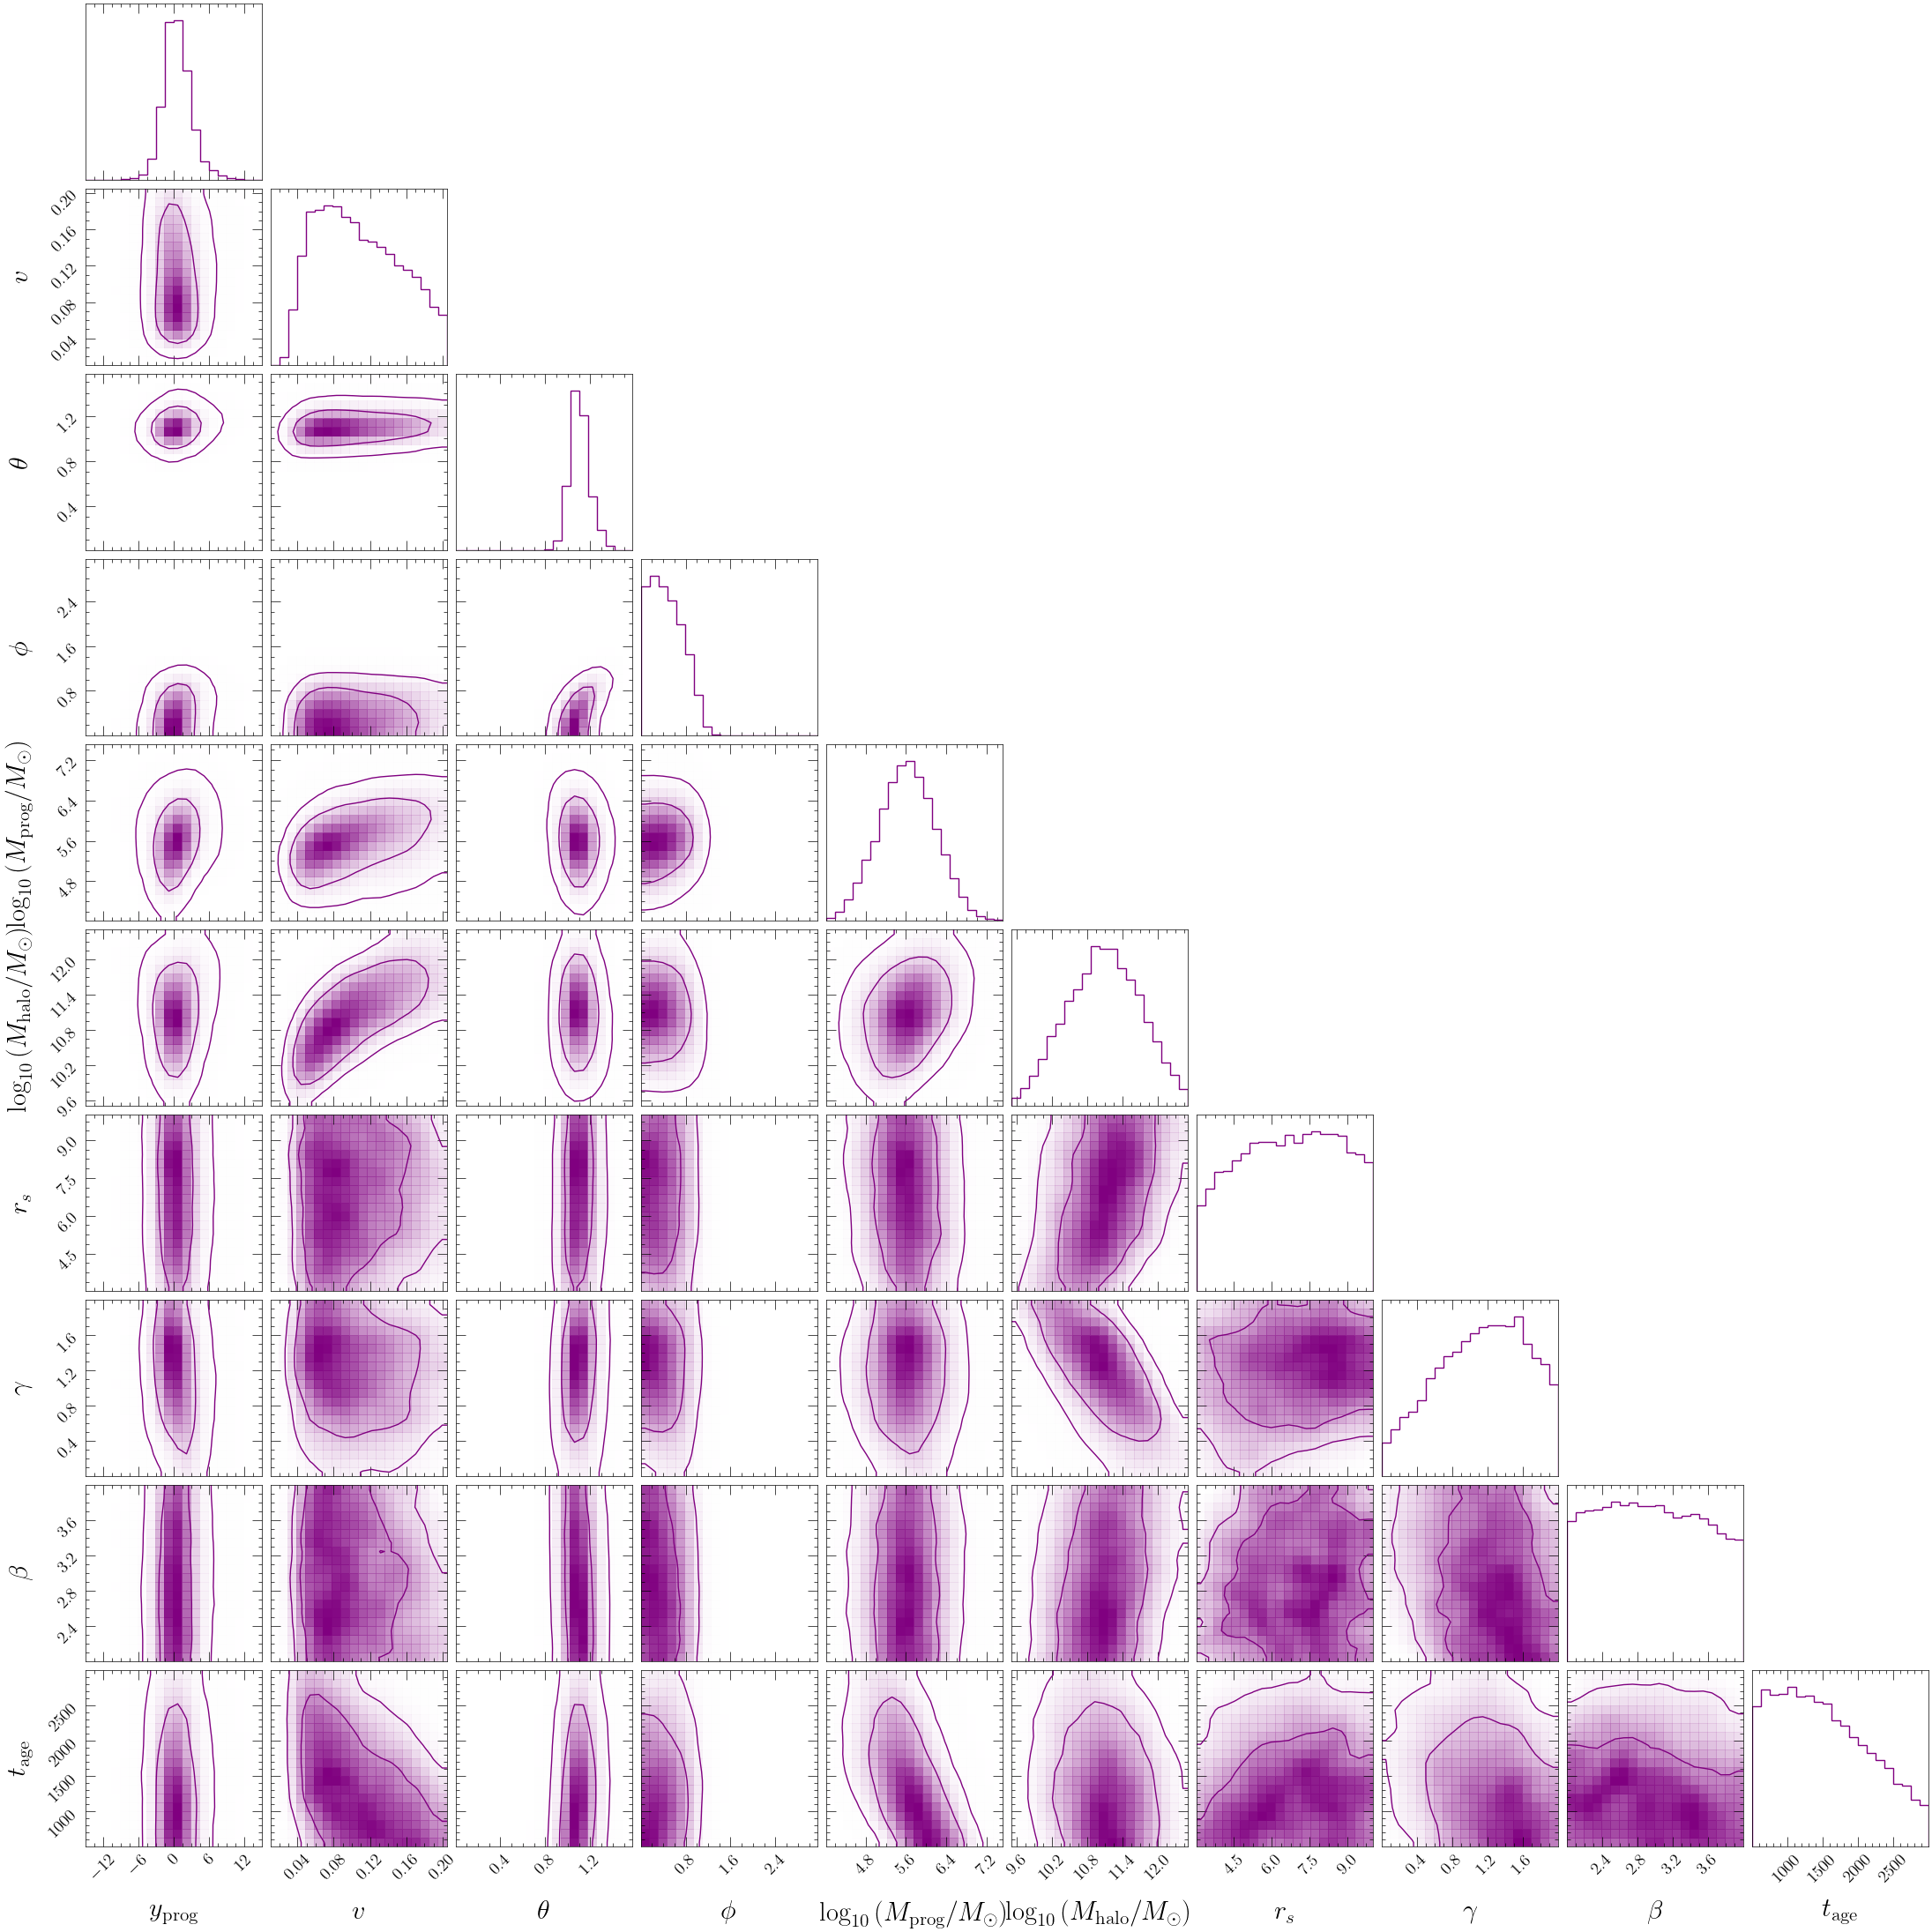

In [16]:
fig = corner.corner(
    #points_select
    points_good , bins=20, labels=prior_keys_latex, color='purple',
    plot_datapoints=False,levels=(0.68,0.95),#truths=true_params,
    smooth=1., truth_color='k', weights = prob_values_of_samples );

axes = fig.get_axes()

for i in range(len(axes)):
    axes[i].tick_params(axis='both', which='major', labelsize=14., length=8)
    axes[i].tick_params(axis='both', which='minor', length=3)


    if axes[i].get_xlabel():
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=22)
    if axes[i].get_ylabel():
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=22)


##plt.savefig('Outer_Constraint_IP.pdf')
#import matplotlib.pyplot as plt

# Save the plot using the base_name variable
plt.savefig(f'UDG_Constraint_corner_{base_name.split("_")[-1]}.pdf')

#plt.savefig('UDG_Constraint_corner_test.pdf')

In [17]:
best_idx = np.argmax(log_l)  # Index of the highest log-likelihood
best_params = points[best_idx]


In [18]:
best_params

array([-4.87969031e-01,  1.58209478e-01,  1.11850529e+00,  7.50596646e-02,
        4.67425734e+00,  1.19435245e+01,  6.99044506e+00,  6.57420188e-01,
        3.08871052e+00,  1.00538962e+03])

In [19]:
best_fit_idx = np.argmax(prob_values_of_samples)  # Index of the highest probability
best_params = points_good[best_fit_idx]  # Get corresponding parameter values

print("Best-fit parameters:", best_params)

Best-fit parameters: [-4.87969031e-01  1.58209478e-01  1.11850529e+00  7.50596646e-02
  4.67425734e+00  1.19435245e+01  6.99044506e+00  6.57420188e-01
  3.08871052e+00  1.00538962e+03]


In [20]:
# 

In [21]:
# best_idx = np.argmax(log_l)  # Index of the highest log-likelihood
# best_params = points[best_idx]

In [22]:
print(best_params)

[-4.87969031e-01  1.58209478e-01  1.11850529e+00  7.50596646e-02
  4.67425734e+00  1.19435245e+01  6.99044506e+00  6.57420188e-01
  3.08871052e+00  1.00538962e+03]


In [23]:
# best_idx_new = np.argmax(points_select)  # Index of the highest log-likelihood
# best_params_new = points[best_idx_new]
# print(best_params_new)

In [24]:
#true_params

In [25]:
np.log10(1.5*10**11)
np.log10(1*10**5)

np.float64(5.0)

In [26]:
10**11.17609

149999565138.204

In [27]:
true_params_new = true_params

In [28]:
true_params_new[4]= 6.3
true_params_new[5]=11.176091259055681 #from fielder halo mass
true_params_new[7]= None

In [29]:
true_params_new

array([-6.05201094e-05,  2.63137296e-02,  1.04111385e+00,  1.35527715e-01,
        6.30000000e+00,  1.11760913e+01,  6.00000000e+00,             nan,
        3.00000000e+00,  1.50000000e+03])

In [30]:
# np.save('UDG_KL_bestparams_wider',best_params)

## Below I'm doing two contours

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm  # cm = colormap

# Choose a value between 0 and 1
val = 0.6  # Example: mid-range of the colormap

# Get the color from the 'copper' colormap
color = cm.get_cmap('copper')(val)

print(color)  # This will be an RGBA tuple


(np.float64(0.7411762961938126), np.float64(0.46871999999999997), np.float64(0.2985), np.float64(1.0))


/tmp/ipykernel_28915/1946671969.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap('copper')(val)


In [33]:
selected_indices = [5, 4, 7]
points_subset = points_select[:, selected_indices]
labels_subset = [prior_keys_latex[i] for i in selected_indices]
true_params_subset = [true_params_new[i] for i in selected_indices] if true_params is not None else None

In [114]:
# Randomly select a point within 1 
import numpy as np

# Calculate 1-sigma (16th and 84th percentile) for each parameter
lower_bounds = np.percentile(points_good, 16, axis=0)
upper_bounds = np.percentile(points_good, 84, axis=0)

# Create a boolean mask for points within the 1-sigma range for all params
inside_1sigma = np.all((points_good >= lower_bounds) & (points_good <= upper_bounds), axis=1)

# Extract points inside 1-sigma region
points_inside = points_good[inside_1sigma]

if len(points_inside) == 0:
    print("No points found inside the 1-sigma region across all parameters.")
else:
    # Randomly select one point inside the 1-sigma region
    random_index = np.random.choice(len(points_inside))
    print(random_index)
    selected_point = points_inside[random_index]

    # Print the selected point's parameter values nicely
    print("Random point inside 1-sigma contours:")
    for i, param_value in enumerate(selected_point):
        print(f"Param {i+1} ({prior_keys_latex[i]}): {param_value}")


854
Random point inside 1-sigma contours:
Param 1 ($y_{\rm prog}$): -1.453049770915202
Param 2 ($v$): 0.14849854495873663
Param 3 ($\theta$): 1.1646965124123028
Param 4 ($\phi$): 0.9010333683221128
Param 5 ($\log_{10}\left( M_{\rm prog} / M_\odot \right)$): 6.23364442451861
Param 6 ($\log_{10}\left( M_{\rm halo} / M_\odot \right)$): 11.133813088679272
Param 7 ($r_s$): 7.448468115059323
Param 8 ($\gamma$): 1.5019128456646849
Param 9 ($\beta$): 3.297736114240786
Param 10 ($t_{\rm age}$): 860.6163926013567


In [179]:
# Assign selected parameter values to named variables
y_prog_fit         = selected_point[0]
speed_fit          = selected_point[1]
vel_theta_fit      = selected_point[2]
vel_phi_fit        = selected_point[3]
log10_M_prog_fit   = selected_point[4]
log10_m_halo_fit   = selected_point[5]
r_s_fit            = selected_point[6]
gamma_fit          = selected_point[7]
beta_fit           = selected_point[8]
t_age_fit          = selected_point[9]

# Optionally, print them to verify
print("\nAssigned best-fit parameter values:")
print(f"y_prog_fit         = {y_prog_fit:.8e}")
print(f"speed_fit          = {speed_fit:.8e}")
print(f"vel_theta_fit      = {vel_theta_fit:.8e}")
print(f"vel_phi_fit        = {vel_phi_fit:.8e}")
print(f"log10_M_prog_fit   = {log10_M_prog_fit:.8e}")
print(f"log10_m_halo_fit   = {log10_m_halo_fit:.8e}")
print(f"r_s_fit            = {r_s_fit:.8e}")
print(f"gamma_fit          = {gamma_fit:.8e}")
print(f"beta_fit           = {beta_fit:.8e}")
print(f"t_age_fit          = {t_age_fit:.8e}")



Assigned best-fit parameter values:
y_prog_fit         = -1.45304977e+00
speed_fit          = 1.48498545e-01
vel_theta_fit      = 1.16469651e+00
vel_phi_fit        = 9.01033368e-01
log10_M_prog_fit   = 6.23364442e+00
log10_m_halo_fit   = 1.11338131e+01
r_s_fit            = 7.44846812e+00
gamma_fit          = 1.50191285e+00
beta_fit           = 3.29773611e+00
t_age_fit          = 8.60616393e+02


/tmp/ipykernel_28915/1797284849.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=cm.get_cmap('copper')(0.7),


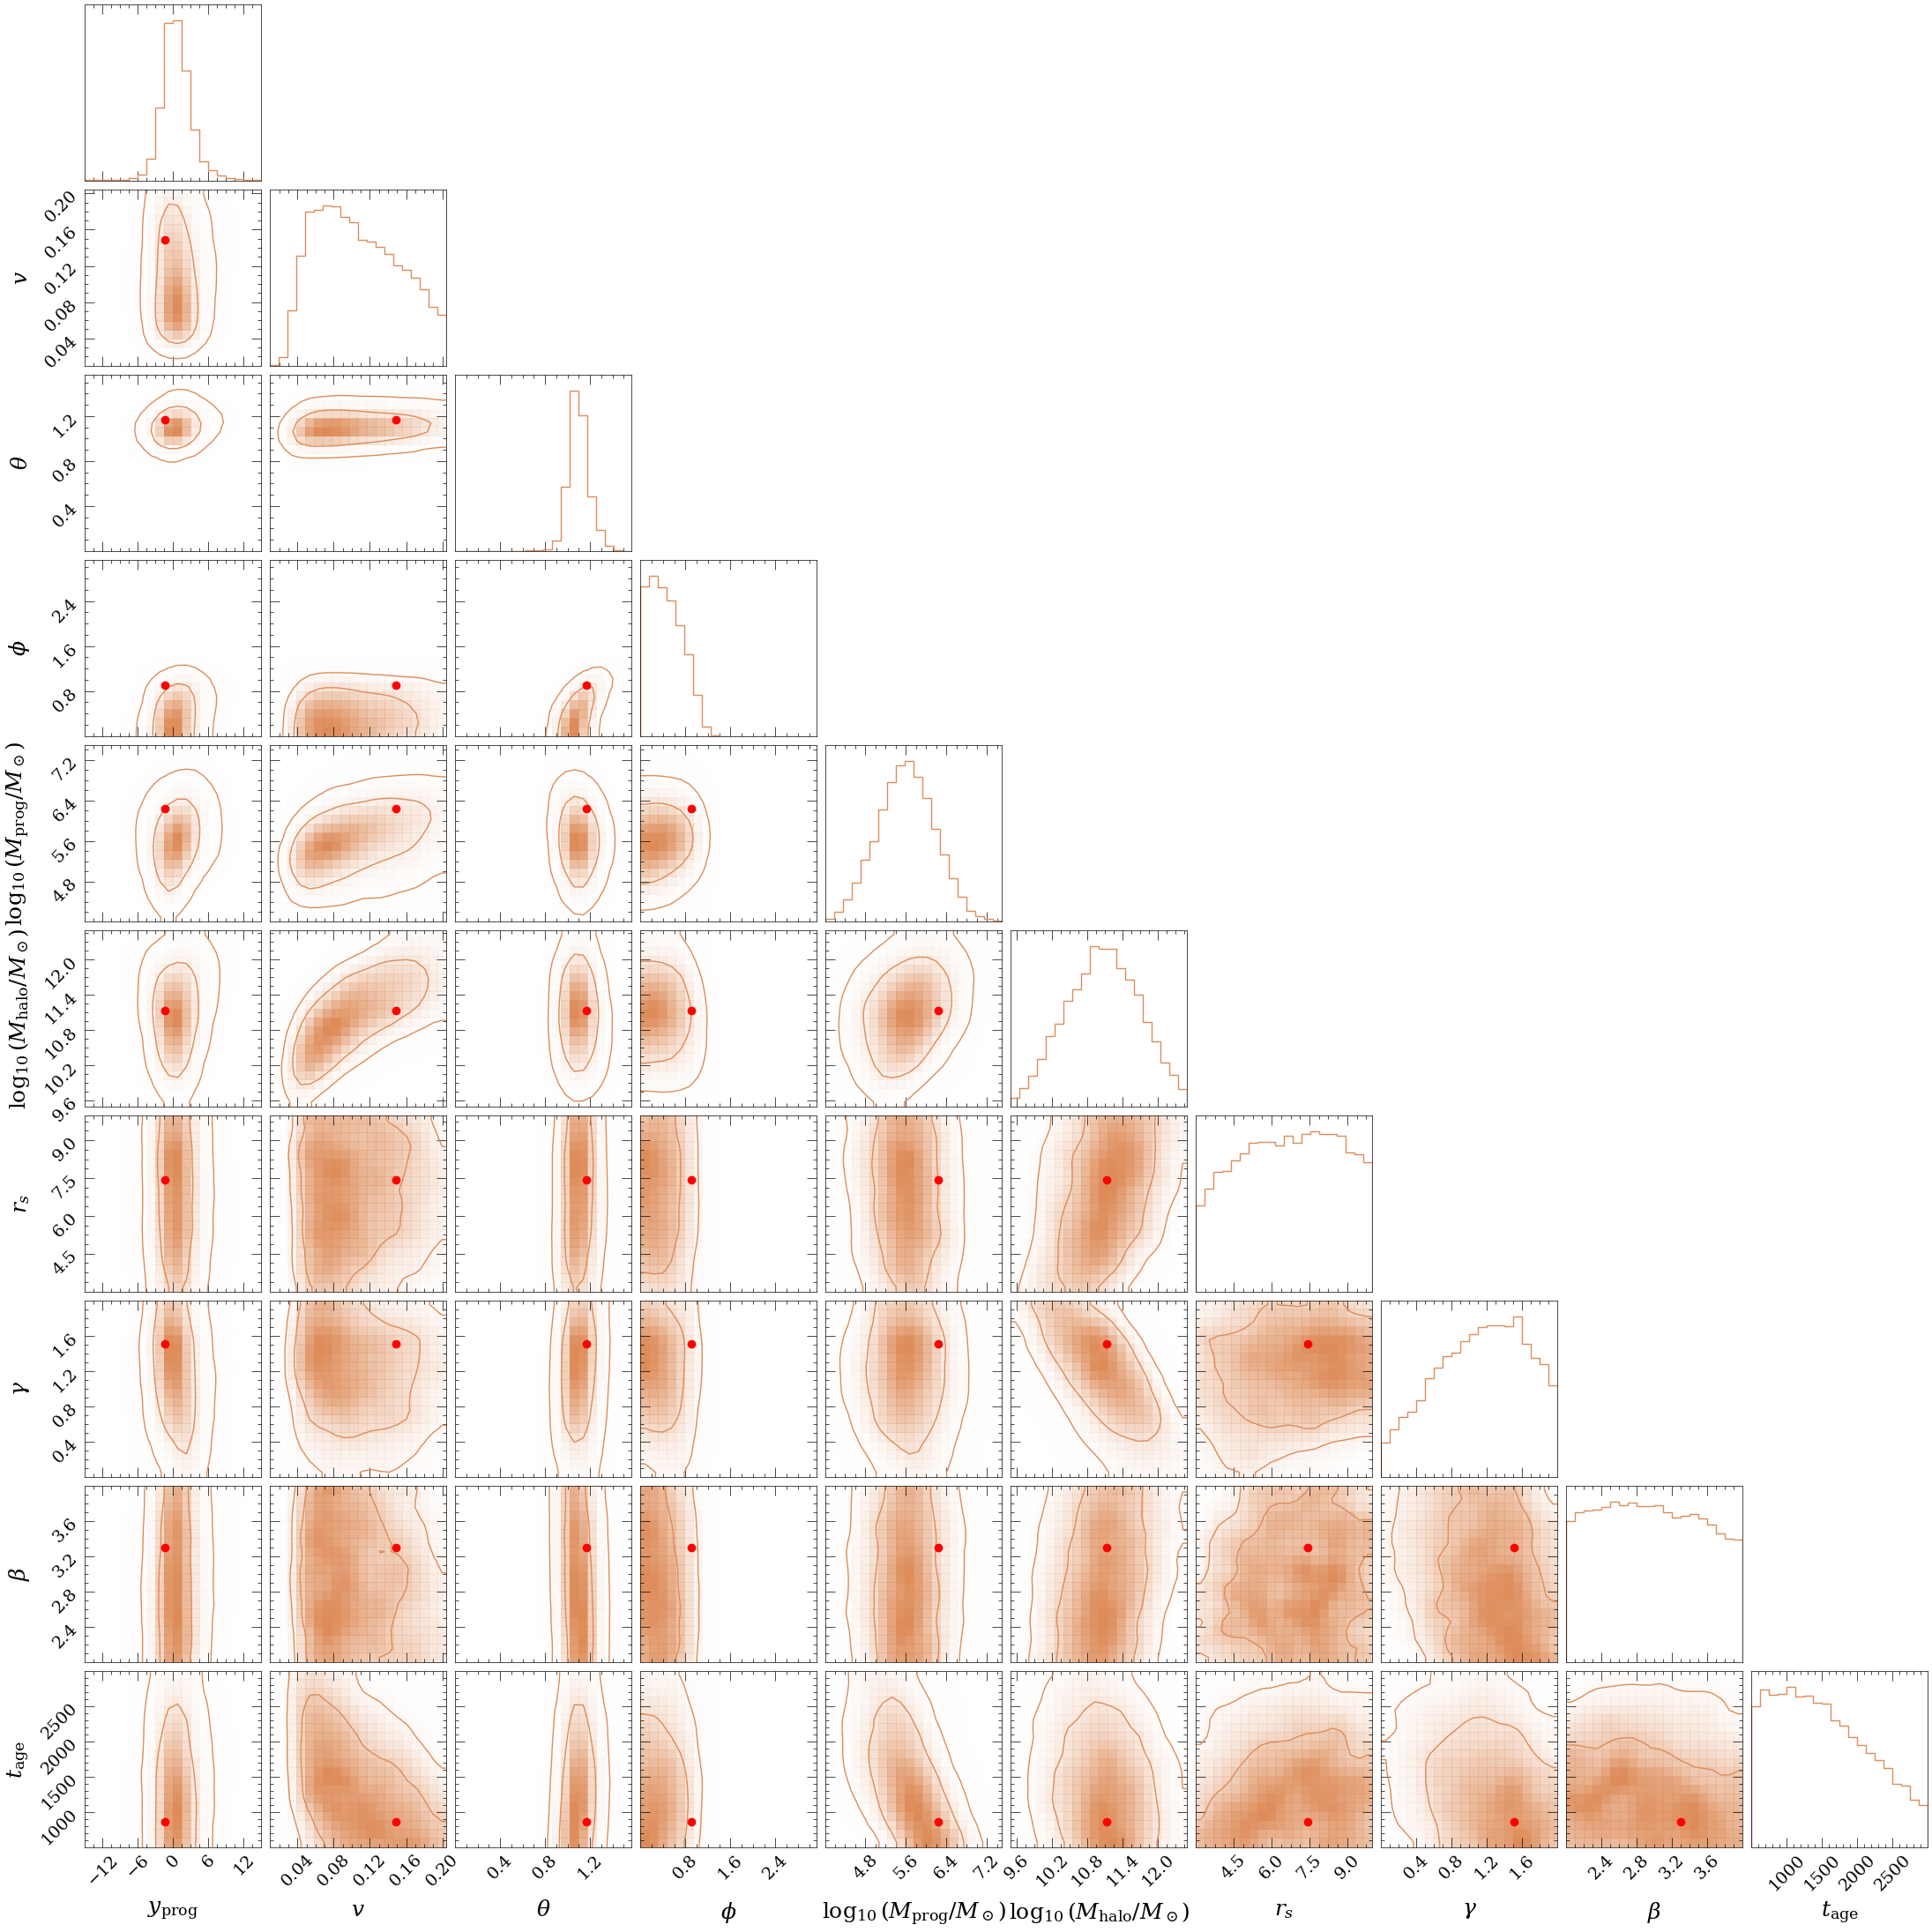

In [189]:
import corner
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Create corner plot without truth values
fig = corner.corner(
    points_good,
    bins=20,
    labels=prior_keys_latex,
    color=cm.get_cmap('copper')(0.7),
    plot_datapoints=False,
    levels=(0.68, 0.95),
    smooth=1.,
    weights=prob_values_of_samples,
)

# Convert axes to 2D array for easy access: axes[i, j] = subplot at row i, column j
ndim = len(prior_keys_latex)
axes = np.array(fig.axes).reshape((ndim, ndim))

# Add red dots ONLY in the 2D panels (i > j)
for i in range(ndim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(
            selected_point[j], selected_point[i],
            'o', color='red', markersize=6, zorder=10
        )

# Format axes
for i in range(ndim):
    for j in range(ndim):
        ax = axes[i, j]
        ax.tick_params(axis='both', which='major', labelsize=14., length=8)
        ax.tick_params(axis='both', which='minor', length=3)
        if ax.get_xlabel():
            ax.set_xlabel(ax.get_xlabel(), fontsize=18)
        if ax.get_ylabel():
            ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.savefig("full_corner_w17_c5.pdf")

In [184]:
selected_point_res = np.array([selected_point[5],selected_point[4],selected_point[7]])

/tmp/ipykernel_28915/3520693848.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=cm.get_cmap('copper')(0.7),
/tmp/ipykernel_28915/3520693848.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  hist_kwargs={"density": True, "color": cm.get_cmap('copper')(0.7), "linewidth": 1.5, "alpha":0.6},


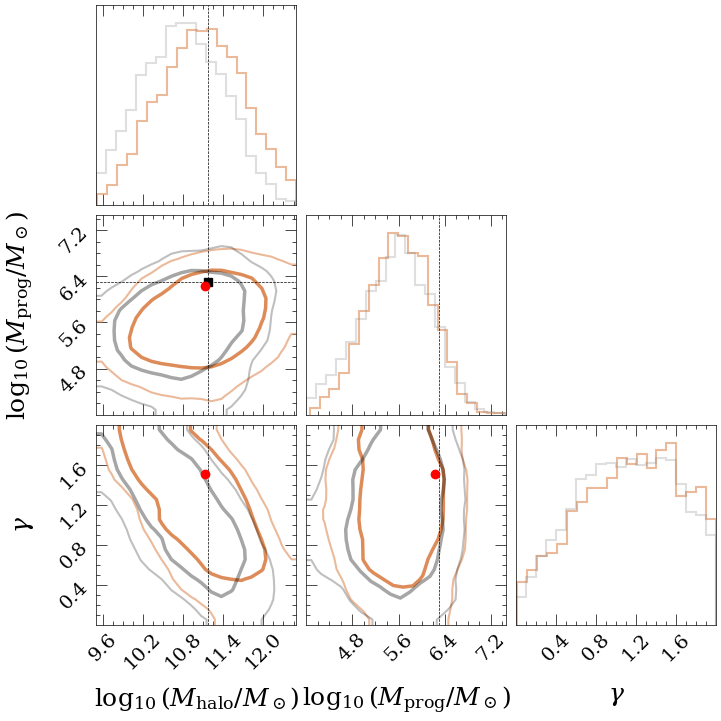

In [193]:
import matplotlib.pyplot as plt
import corner

# Your existing code to create the corner plot...

fig = corner.corner(
    points_subset,
    bins=20,
    labels=labels_subset,
    color=cm.get_cmap('copper')(0.7),
    plot_datapoints=False,
    levels=(0.68, 0.95),
    truths=true_params_subset,
    smooth=1.0,
    truth_color='k',  # Keep black or change as you want
    plot_contours=True,
    fill_contours=False,
    hist_kwargs={"density": True, "color": cm.get_cmap('copper')(0.7), "linewidth": 1.5, "alpha":0.6},
    plot_density=False,
    contour_kwargs={"linewidths": [1.5, 2.5], "alpha": [0.6,1.0]}
)

# Convert axes to 2D array for easy access: axes[i, j] = subplot at row i, column j
ndim = len(selected_point_res)
axes = np.array(fig.axes).reshape((ndim, ndim))

# Add red dots ONLY in the 2D panels (i > j)
for i in range(len(selected_point_res)):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(
            selected_point_res[j], selected_point_res[i],
            'o', color='red', markersize=6, zorder=10
        )

for ax in fig.get_axes():
    for line in ax.get_lines():
        # Check if this line is a truth line by color and linestyle heuristic
        # Truth lines usually have 'k' color and solid linestyle by default
        if line.get_color() == 'k' and line.get_linestyle() == '-':
            line.set_alpha(1.0)         # full opacity
            line.set_linestyle('--')    # dash-dot line
            line.set_linewidth(0.5)     # thicker line if you want


# Then overlay the second gray set as you have

points_subset2 = points_select2[:, selected_indices]

corner.corner(
    points_subset2,
    fig=fig,
    bins=20,
    labels=labels_subset,
    color='black',
    plot_datapoints=False,
    levels=(0.68, 0.95),
    smooth=1.0,
    plot_density=False,
    plot_contours=True,
    fill_contours=False,
    line_kwargs={"linestyle": "--", "linewidth": 1.5, "color": "gray"},
    hist_kwargs={"density": True, "color": "gray", "linestyle": "-", "linewidth": 1.5, "alpha":0.25},
    contour_kwargs={"linewidths": [1.5, 2.5], "alpha": [0.25,0.35]}
)

# Styling the axes remains the same
axes = fig.get_axes()
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=14, length=8)
    ax.tick_params(axis='both', which='minor', length=3)
    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.savefig("subset_corner_w17.pdf")


# Now make random fit plot

## First all the stream gen stuff

In [115]:

import streamsculptor
from streamsculptor import  potential
from streamsculptor import fields
from streamsculptor import JaxCoords as jc
import diffrax
from jax.scipy.stats import gaussian_kde
import jax
import equinox as eqx
jax.config.update("jax_enable_x64", True)


from gala.units import UnitSystem
from astropy import units as u
usys = UnitSystem(u.kpc, u.Myr, u.Msun, u.radian)
import jax.numpy as jnp


import gala.coordinates as gc
from functools import partial
from gala.units import galactic

import tqdm
#import scienceplots
import matplotlib as mpl
#plt.style.use('science')
mpl.rcParams['text.usetex'] = False ## We do not have LaTex on stellar HPC...
from astropy.constants import G as G_
#import tqdm
G_jax = jnp.array(G_.to(u.kpc**3 / (u.Msun * u.Myr**2)).value)

from scipy.interpolate import UnivariateSpline
#from scipy.integrate import cumtrapz

from jax import random

In [116]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

gpu


In [117]:
# To resolve potential well enough we need the general_nfw_interp.npy file 
interp_func = jnp.load('../general_nfw_interp.npy',allow_pickle=True).item() 
@jax.jit
def generalized_nfw_potential(xyz, t, params):
    r = jnp.sqrt(jnp.sum(xyz**2)) 
    r_over_r_s = r/params['r_s']
    bracket = interp_func(r_over_r_s,params['gamma'],params['beta'])*(params['r_s']**2)
    return -4*jnp.pi*G_jax*bracket*params['rho0']


params = dict(gamma=1.0,beta=3, r_s=10.0, rho0=1e7) #An example of parameters to check that it works

In [118]:
#Not sure what this does
from streamsculptor.potential import CustomPotential
def get_general_NFW_potential(params):
    pot = lambda xyz, t: generalized_nfw_potential(xyz, t, params)
    return CustomPotential(potential_func=pot, units=usys)

#Test
get_general_NFW_potential(params).potential(jnp.array([1.0,2.0,3.0]),0.0)

Array(-0.04455536, dtype=float64)

In [119]:
#Calculate rho0 from nfw profile:
@jax.jit
def get_nfw_rho0(M,r_s):
    c_NFW = 5.# UDG # 15#following https://arxiv.org/pdf/2211.04495 #Should I change this?
    denom = jnp.log(1. + c_NFW) - (c_NFW/(1+c_NFW))
    fac = 1./denom
    rho0 = (M/(4*jnp.pi*r_s**3))*fac
    return rho0
np.log10(get_nfw_rho0(3e12,22.))

np.float64(7.369084699988621)

In [120]:
from streamsculptor.potential import MiyamotoNagaiDisk
from streamsculptor import potential

In [121]:
from functools import partial
# Define potential with halo and disk

def get_potential(params):
    #The disk is the stars in the galaxy
    # m sets the mass of the disk, a is the scale length and b is the scale height of the disk
    pot_disk =  MiyamotoNagaiDisk(m=params['m_disk'], a=params['a_disk'],b=params['b_disk'],units=usys)


    rho0 = get_nfw_rho0(params['M'],params['r_s'])
    
    pot_halo = get_general_NFW_potential(dict(rho0=rho0, gamma=params['gamma'], beta=params['beta'],
                                              r_s=params['r_s']))

    #I only use halo...
    potential_list = [pot_halo]
    pot = potential.Potential_Combine(potential_list=potential_list,units=usys)
    return pot




@partial(jax.jit,static_argnums=(15,))
def gen_stream(x_prog=None, 
               y_prog=None, 
               z_prog=None, 
               log10_M_prog=None, 
               speed=None, 
               vel_theta=None, 
               vel_phi=None, 
               log10_m_disk=None, 
               a_disk=None,
               b_disk=None, 
               log10_m_halo=None, 
               r_s=None, 
               gamma=None, 
               beta=None, 
               t_age=None, 
               N_arm=None,
               offset=jnp.array([-40,0.0,140.0,0.0,0.0,0.0])):
    """
    x and z is sky plane, y is LOS
    xyz_prog is the progenitor position today in these coords
    speed is the total speed of the prog.
    vel_theta controls the spherical polar direction of the unit velocity vector [0,pi]
    vel_phi controls the azimuthal direction of the unit velocity vector [0,2pi]
    """
    params = {'m_disk':10**log10_m_disk, 'a_disk': a_disk, 'b_disk': b_disk, 'M': 10**log10_m_halo,
                          'r_s': r_s, 'gamma': gamma, 'beta':beta, 't_age':t_age}
    pot = get_potential(params)
    v_x_hat = jnp.sin(vel_theta)*jnp.cos(vel_phi)
    v_y_hat = jnp.sin(vel_theta)*jnp.sin(vel_phi)
    v_z_hat = jnp.cos(vel_theta) #SP moved
    velocity_today = jnp.array([v_x_hat, v_y_hat, v_z_hat])*speed
    

    pos_today = jnp.array([x_prog, y_prog, z_prog])
    w_today = jnp.hstack([pos_today, velocity_today])
    
    ts = jnp.linspace(-t_age,0,N_arm) #4_000



    
    w_init = pot.integrate_orbit(w0=w_today, t0=0.0, t1=-t_age, ts=jnp.array([-t_age]),
                                solver=diffrax.Tsit5(),atol=1e-6, rtol=1e-6,dtmin=0.5,max_steps=20_000).ys[0]

    #    save_times_orbit = jnp.linspace(t0=0, t1, n_stripping_times)
    save_times_orbit = jnp.linspace(0,t_age, 1000)
    prog_orb = pot.integrate_orbit(w0=w_init,              
                                     ts=save_times_orbit, 
                                     solver=diffrax.Tsit5(), 
                                     max_steps=10_000, 
                                     rtol=1e-6, 
                                     atol=1e-6, 
                                 dtmin=0.5)
    
    ## Now generate a mock stream along the above orbit
    Msat = 10**log10_M_prog #progenitor mass
    seed = 4031
    kval_arr=jnp.array([1.3,0.0,0.0,0.0,.5,.5,.6,0.0])
    lead_arm, trail_arm = pot.gen_stream_vmapped(prog_w0=w_init, ts=ts, Msat=Msat, seed_num=seed,
                                                solver=diffrax.Tsit5(),atol=1e-6, rtol=1e-6,dtmin=0.5,
                                                kval_arr=kval_arr, max_steps=20_000)
    stream = jnp.vstack([lead_arm,trail_arm])
    return dict(w_today=w_today, prog_orb = prog_orb, stream=stream, stripping_times=jnp.hstack([ts, ts]))
#

## Now plot random stream within 1 sigma


Assigned best-fit parameter values:
y_prog_fit         = -1.45304977e+00
speed_fit          = 1.48498545e-01
vel_theta_fit      = 1.16469651e+00
vel_phi_fit        = 9.01033368e-01
log10_M_prog_fit   = 6.23364442e+00
log10_m_halo_fit   = 1.11338131e+01
r_s_fit            = 7.44846812e+00
gamma_fit          = 1.50191285e+00
beta_fit           = 3.29773611e+00
t_age_fit          = 8.60616393e+02


In [123]:
x_prog = -1.99115309e+00 
z_prog = 5.43990100e-01

In [124]:

UDG_stream_prog1 = dict(x_prog=x_prog,y_prog=y_prog_fit,z_prog=z_prog,speed=speed_fit ,vel_theta=vel_theta_fit,\
                          vel_phi=vel_phi_fit, log10_M_prog=log10_M_prog_fit,
                        log10_m_disk=jnp.log10(5e10), a_disk=3.0,b_disk=0.2,log10_m_halo=log10_m_halo_fit,r_s=r_s_fit,gamma=gamma_fit,\
                          beta=beta_fit,#3.674,
                         t_age=t_age_fit, N_arm=4_000) #4_000

In [125]:
UDG_stream_dict1 = gen_stream(**UDG_stream_prog1)


In [126]:
pos_today_fit = np.array([x_prog,y_prog_fit, z_prog ])

In [127]:
v_x_hat = jnp.sin(vel_theta_fit)*jnp.cos(vel_phi_fit)
v_y_hat = jnp.sin(vel_theta_fit)*jnp.sin(vel_phi_fit)
v_z_hat = jnp.cos(vel_theta_fit) 
velocity_today_fit = jnp.array([v_x_hat, v_y_hat, v_z_hat])*speed_fit
velocity_today_fit*(u.kpc/u.Myr).to(u.km/u.s)

Array([ 82.80935975, 104.57464572,  57.35854893], dtype=float64)

In [128]:
#DM halo enclosed mass...
rho0_fit = np.log10(get_nfw_rho0(10**log10_m_halo_fit,r_s_fit ))
print(rho0_fit)
trial_pot = get_general_NFW_potential(dict(rho0=10**rho0_fit, gamma=gamma_fit, beta=beta_fit,
                                              r_s=r_s_fit))


7.436843687398876


In [129]:
from astropy.constants import G
G_jax = jnp.array(G.to((u.kpc**3 / (u.Msun * u.Myr**2))).value)

In [130]:
#get it only enclosed here...
R_enclosed = np.sqrt(x_prog**2+y_prog_fit**2 +z_prog**2) #kpc...


In [131]:

#trial_pot = JaxStreams.GeneralNFWPotential(r_s=r_s,rho0=rho0_BF,gamma=gamma,beta=beta,units=usys)
a_r_Jax = trial_pot.acceleration(jnp.array([R_enclosed,0.0,0.0]),0.0) #needs to be within kpc

# a_r = -G M_enc / r^2
M_halo_enc_jax = (-a_r_Jax)*(R_enclosed**2) / G_jax




In [132]:
M_halo_enc_jax / 1e9

Array([13.63553506,  0.        ,  0.        ], dtype=float64)

## Calculate Jacobi radius of this configuration

In [133]:
prog_orb1 =UDG_stream_dict1['prog_orb']
prog_orb1.ts
r_orb1 = jnp.sqrt(jnp.sum(prog_orb1.ys[:,:3]**2,axis=1))

In [134]:

a_r_Jax_min = trial_pot.acceleration(jnp.array([np.min(r_orb1),0.0,0.0]),0.0) #needs to be within kpc

# a_r = -G M_enc / r^2
M_halo_enc_jax_min = (-a_r_Jax)*(np.min(r_orb1)**2) / G_jax


rJ_min =  np.min(r_orb1)*(10**log10_M_prog_fit/(M_halo_enc_jax_min))**(1/3)

In [198]:
rJ = R_enclosed*(10**log10_M_prog_fit/(M_halo_enc_jax))**(1/3)

## Make plot for paper 
Look at Nib core plot script 

In [135]:
dat_x = np.load('dat_w17_paper.npy')[0]
dat_z = np.load('dat_w17_paper.npy')[1]

In [200]:
rJ_min

Array([0.09045664,        inf,        inf], dtype=float64)

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_28915/2136876269.py:16: SyntaxWarning: invalid escape sequence '\o'
  ax.scatter(x_prog, z_prog, marker='.', s=100, label=r'm$_{\rm prog}$ = ' + str(np.round(10**log10_M_prog_fit/10**6,2)) + ' x $10^6$ M$_{\odot}$', color='red')


pos = [-1.99 -1.45  0.54] kpc
vel = [ 82.81 104.57  57.36] km/s
M$_{\rm halo,tot}$ = 1.36x $10^{11}$M$_{\odot}$


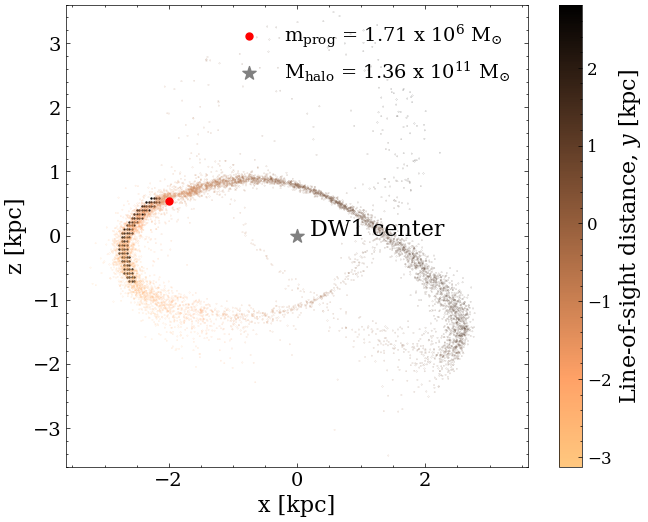

In [202]:
import matplotlib.pyplot as plt

# Create the figure and axis
f, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=True, sharey=True)
#ax.set_title('Best fit', fontsize=18)  # Larger title
ax.set_aspect('equal', adjustable='box')
# Scatter plot of stream
col = UDG_stream_dict1['stream'][:,1]

          # label='vel = ' + str(np.round(velocity_today_fit * (u.kpc/u.Myr).to(u.km/u.s), 2)) + ' km/s')

ax.scatter(dat_x[::1], dat_z[::1], color='black', s=0.5)#,# cmap='Blues',

sc = ax.scatter(UDG_stream_dict1['stream'][:, 0], UDG_stream_dict1['stream'][:, 2], cmap='copper_r',
                s=0.006, c=col, rasterized=True)#, label='pos = ' + str(np.round(pos_today_fit, 2)) + ' kpc')
ax.scatter(x_prog, z_prog, marker='.', s=100, label=r'm$_{\rm prog}$ = ' + str(np.round(10**log10_M_prog_fit/10**6,2)) + ' x $10^6$ M$_{\odot}$', color='red')
ax.scatter(0,0, marker='*', s=100, color='gray', label=r'M$_{ \rm halo}$ = ' + str(np.round(10**log10_m_halo_fit/ 1e11, 2)) + r' x $10^{11}$ M$_{\odot}$')
           #label=r'M$_{ \rm halo,enclosed}$ = ' + str(np.round(M_halo_enc_jax[0] / 1e9, 2)) + r' x $10^9$ M$_{\odot}$')

print('pos = ' + str(np.round(pos_today_fit, 2)) + ' kpc')
print('vel = ' + str(np.round(velocity_today_fit * (u.kpc/u.Myr).to(u.km/u.s), 2)) + ' km/s')
print(r'M$_{\rm halo,tot}$ = ' + str(np.round(10**log10_m_halo_fit / 1e11, 2)) + r'x $10^{11}$M$_{\odot}$')

# Axis labels with larger font
ax.set_xlabel('x [kpc]', fontsize=16)
ax.set_ylabel('z [kpc]', fontsize=16)

# Set tick label sizes
ax.tick_params(axis='both', labelsize=14)

# Limits
ax.set_xlim([-3.6, 3.6])
ax.set_ylim([-3.6, 3.6])

# Legend
ax.legend(loc='upper right', fontsize=14)

# Colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Line-of-sight distance, $y$ [kpc]', fontsize=16)
cbar.ax.tick_params(labelsize=12)

# Annotate with text
ax.text(0.2, 0, 'DW1 center', size=16)
# ax.text(-1, 1.2, 'Leading arm', size=14)
# ax.text(-3.2, -1.2, 'Trailing arm', size=14)

#ax.text(-3, -2.5, r'$r_J$ = ' + str(np.round(rJ[0]*u.kpc.to(u.pc), 2)) + ' pc', size=14)
#ax.text(-3, -3, r'M$_{ \rm halo,enclosed}$ = ' + str(np.round(M_halo_enc_jax[0] / 1e9, 2)) + r'x $10^9$M$_{\odot}$', size=14)
#ax.text(-3, -3.5, r'M$_{\rm halo,tot}$ = ' + str(np.round(10**log10_m_halo_fit / 1e11, 2)) + r'x $10^{11}$M$_{\odot}$', size=14)
f.savefig('UDG_random_w17_c5.pdf', dpi=300)

(0.35, 3.75)

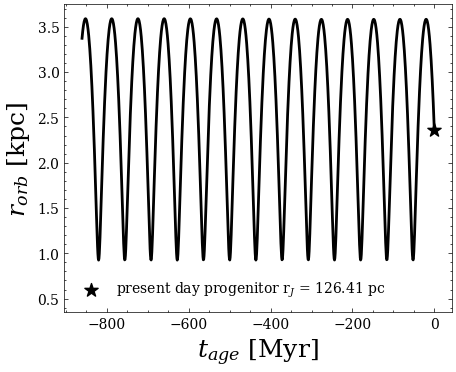

In [199]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,4)
ax.plot(prog_orb1.ts-t_age_fit, r_orb1,zorder=5,color='k',lw=2,)
ax.set_ylabel(r'$r_{orb}$ [kpc]', fontsize=18)
ax.set_xlabel(r'$t_{age}$ [Myr]', fontsize=18)
ax.scatter(0, r_orb1[-1], marker = '*', s= 100,c='black', label=r'present day progenitor r$_J$ = ' + str(np.round(rJ[0]*u.kpc.to(u.pc), 2)) + ' pc')
ax.legend()
ax.set_ylim([0.35,3.75])

## Make paper plot

In [153]:
plt.clf()

<Figure size 350x262.5 with 0 Axes>

In [203]:
np.max(r_orb1)

Array(3.58964674, dtype=float64)

In [204]:
np.min(r_orb1)

Array(0.92485874, dtype=float64)